In [48]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

In [49]:
import numpy as np
import tensorflow as tf                              # tensorflow 기본 import
from tensorflow.keras.models import Sequential       # model box 구성
from tensorflow.keras.layers import Flatten, Dense, Dropout # model 안의 input layer와
                                                      # output layer를 구성
from tensorflow.keras.optimizers import Adam , SGD        # 알고리즘 담당
import sklearn
from sklearn.model_selection import train_test_split # train Data, Test Data 분리
from sklearn.preprocessing import MinMaxScaler       # 데이터 정규화
                                                      # 컴퓨터가 큰숫자를 작은숫자로 변경
                                                      # 0~1사이 실수 값으로 변경

In [50]:
import pandas as pd
df = pd.read_csv("../data/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [51]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [52]:
df.shape

(1025, 14)

In [53]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [54]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [55]:
y_data = df['target']
(y_data.values > 0).sum()

np.int64(526)

In [56]:
import seaborn as sns 
import matplotlib.pyplot as plt

C:\Users\user\AppData\Local\Temp\ipykernel_24568\2302084831.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(["No heart disease","heart disease"])


Text(0.5, 0, '')

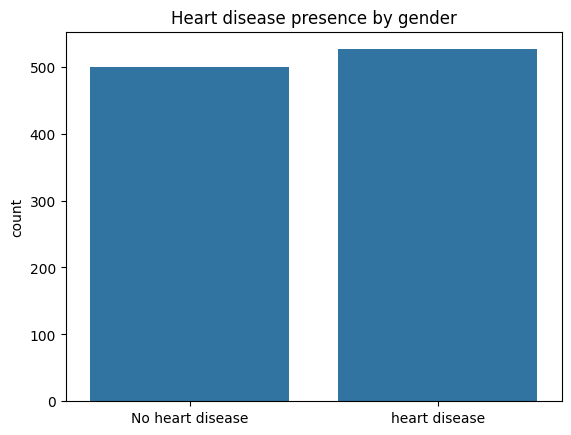

In [57]:
f = sns.countplot(x="target", data=df)
f.set_title("Heart disease presence by gender")
f.set_xticklabels(["No heart disease","heart disease"])
plt.xlabel("")

C:\Users\user\AppData\Local\Temp\ipykernel_24568\3555542232.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(["No heart disease","heart disease"])


Text(0.5, 0, '')

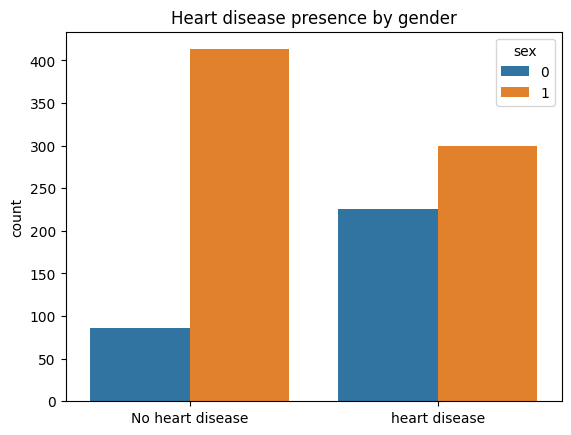

In [58]:
f = sns.countplot(x="target", data=df, hue="sex")
f.set_title("Heart disease presence by gender")
f.set_xticklabels(["No heart disease","heart disease"])
plt.xlabel("")

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'sex'),
 Text(2.5, 0, 'cp'),
 Text(3.5, 0, 'trestbps'),
 Text(4.5, 0, 'chol'),
 Text(5.5, 0, 'fbs'),
 Text(6.5, 0, 'restecg'),
 Text(7.5, 0, 'thalach'),
 Text(8.5, 0, 'exang'),
 Text(9.5, 0, 'oldpeak'),
 Text(10.5, 0, 'slope'),
 Text(11.5, 0, 'ca'),
 Text(12.5, 0, 'thal'),
 Text(13.5, 0, 'target')]

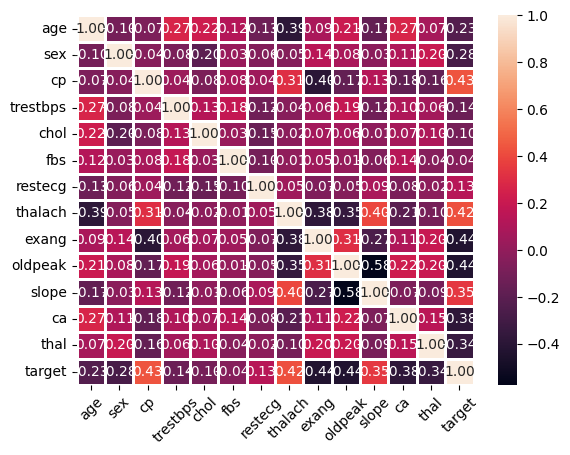

In [59]:
heat_map = sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', linewidth=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45)

In [60]:
# 독립변수와 종속변수를 분리해야 해요.
x_data = df.drop('target', axis=1, inplace=False)  # 2 차원 협태의 pixel(28 * 28)
y_data = df['target']    # 1차원

In [61]:
x_data.shape

(1025, 13)

In [62]:
y_data.shape

(1025,)

In [63]:
# pixel data(x_data) 를 정규화(0~1사이의 실수값으로 변화)

scaler = MinMaxScaler()
scaler.fit(x_data)        # scaler를 학습시키고 - min, max
norm_x_data = scaler.transform(x_data)  # scaler 를 통해서 실제로 값을 변환(0 ~ 1 변경)

In [64]:
norm_x_data.shape

(1025, 13)

In [65]:
norm_x_data

array([[0.47916667, 1.        , 0.        , ..., 1.        , 0.5       ,
        1.        ],
       [0.5       , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.85416667, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.375     , 1.        , 0.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [0.4375    , 0.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.52083333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ]])

In [66]:
x_train, x_test, y_train,  y_test = train_test_split(norm_x_data, y_data, test_size = 0.2, random_state = 42)

In [67]:
model = Sequential()    # model 생성

model.add(Dense(64, activation='relu', input_shape=(x_data.shape[1],)))     # 모델 box에 input layer 추가 
model.add(Dense(512, activation="relu")) 
model.add(Dense(256, activation="sigmoid")) 
model.add(Dense(128, activation="relu")) 
model.add(Dense(1, activation="sigmoid")) # 모델 box에 output layer 추가
                                                  # activation은 확률을 알아내기 위해 각 노드가 수행하는 수학적 연산.

C:\Users\user\anaconda3\envs\python\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,529 (775.50 KB)

 Trainable params: 198,529 (775.50 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
# model이 어떻게 도작하는지를 지정
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',    # binary_crossentropy
              metrics=["accuracy"]
             )

In [70]:
hist = model.fit(x_train,
          y_train,
          epochs=100,
          verbose=1,
          validation_split=0.2)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4907 - loss: 0.7080 - val_accuracy: 0.6890 - val_loss: 0.5828
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7669 - loss: 0.5161 - val_accuracy: 0.7622 - val_loss: 0.4426
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8085 - loss: 0.4035 - val_accuracy: 0.8232 - val_loss: 0.4143
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8592 - loss: 0.3546 - val_accuracy: 0.7622 - val_loss: 0.5085
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8292 - loss: 0.3633 - val_accuracy: 0.8415 - val_loss: 0.4049
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8987 - loss: 0.2849 - val_accuracy: 0.8476 - val_loss: 0.3975
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8973 - loss: 0.2752 - val_accuracy: 0.8841 - val_loss: 0.4059
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9000 - loss: 0.2424 - val_accuracy: 0.8232 - 

26/26 [==============================] - 0s 10ms/step - loss: 0.2071 - accuracy: 0.6732 - val_loss: 0.2919 - val_accuracy: 0.4976
Epoch 59/100
26/26 [==============================] - 0s 15ms/step - loss: 0.2054 - accuracy: 0.6707 - val_loss: 0.2891 - val_accuracy: 0.5366
Epoch 60/100
26/26 [==============================] - 0s 10ms/step - loss: 0.2037 - accuracy: 0.6732 - val_loss: 0.2927 - val_accuracy: 0.5268
Epoch 61/100
26/26 [==============================] - 0s 14ms/step - loss: 0.2042 - accuracy: 0.6732 - val_loss: 0.2974 - val_accuracy: 0.4878
Epoch 62/100
26/26 [==============================] - 0s 14ms/step - loss: 0.2082 - accuracy: 0.6768 - val_loss: 0.2884 - val_accuracy: 0.5024
Epoch 63/100
26/26 [==============================] - 0s 9ms/step - loss: 0.2041 - accuracy: 0.6756 - val_loss: 0.2903 - val_accuracy: 0.5220
Epoch 64/100
26/26 [==============================] - 0s 14ms/step - loss: 0.2048 - accuracy: 0.6805 - val_loss: 0.3002 - val_accuracy: 0.4780
Epoch 65/100


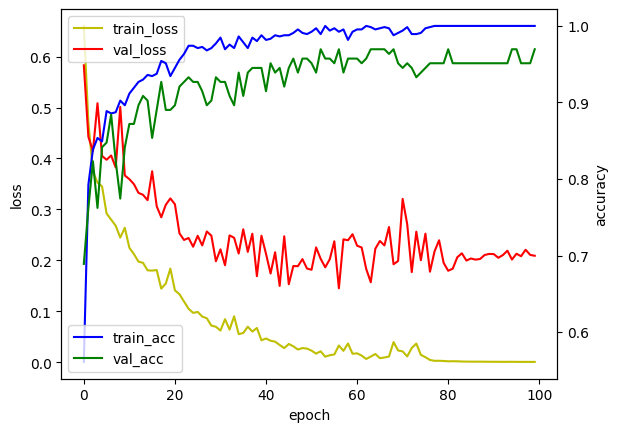

In [71]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")

In [72]:
model.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9523 - loss: 0.5541 


[0.35635825991630554, 0.9658536314964294]

In [73]:
df.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [220]:
pred_x_data = np.array([[52, 1, 0, 125,	212, 0, 1, 168,	0, 1.0,	2, 2, 3],
                        [59, 1,	4, 180,	221, 0,	1, 164, 1, 0.0,	2, 1, 3]])
pred_x_data

array([[ 52.,   1.,   0., 125., 212.,   0.,   1., 168.,   0.,   1.,   2.,
          2.,   3.],
       [ 59.,   1.,   4., 180., 221.,   0.,   1., 164.,   1.,   0.,   2.,
          1.,   3.]])

In [221]:
pred_x_data.shape

(2, 13)

In [222]:
predic_x_data = scaler.transform(pred_x_data)

C:\Users\user\anaconda3\envs\python\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [223]:
model.predict(predic_x_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[2.2633714e-07],
       [9.9995494e-01]], dtype=float32)

In [132]:
import pandas as pd

corr = df.corr()
print(corr['target'].sort_values(ascending=False))

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64
